## Spaceship Titanic
---
> Kaggle data contest : [링크](https://www.kaggle.com/competitions/spaceship-titanic/overview)

[분석 참조 1](https://velog.io/@yg_j/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-Spaceship-Titanic-%EC%BD%94%EB%93%9C-%EB%B6%84%EC%84%9D)

[분석 참조 2](https://www.kaggle.com/code/simonpark333/2-spaceship-prediction)

## 1. 데이터 분석

#### 피처 설명

- **PassengerId** : 각 승객의 고유 ID. 각 Id는 승객이 함께 여행하는 그룹을 나타내고 그룹 내의 번호를 나타내는 형식을 취합니다. 그룹의 사람들은 종종 가족 구성원이지만 항상 그런 것은 아닙니다.
- **HomePlanet** : 승객이 출발한 행성으로, 일반적으로 승객이 거주하는 행성입니다.
- **CryoSleep** : 승객이 항해 기간 동안 정지된 애니메이션을 선택했는지 여부를 나타냅니다. cryosleep의 승객은 객실에 갇혀 있습니다.
- **Cabin** : 승객이 머무르는 캐빈 번호. 형식을 취합니다 deck/num/side. 여기 에서 Port 또는 Starboard 가 side될 수 있습니다.
- **Destination** : 승객이 내릴 행성.
- **Age** : 승객의 나이.
- **VIP** : 승객이 항해 중 특별 VIP 서비스 비용을 지불했는지 여부.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** : 승객이 Spaceship Titanic 의 다양한 고급 편의 시설 각각에 대해 청구한 금액입니다.
- **Name** : 승객의 성과 이름.
- **<span style='color:red'>Transported</span>** : 승객이 다른 차원으로 이동했는지 여부. 이것은 목표, 예측하려는 열입니다

## Import the library

In [2]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# DataFrame으로 데이터 세트 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import missingno
%matplotlib inline

In [25]:
df=pd.read_csv('/content/drive/My Drive/CUAI_BASIC/spaceship-titanic/train.csv')

In [26]:
data=pd.read_csv('/content/drive/My Drive/CUAI_BASIC/spaceship-titanic/test.csv')

In [7]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [9]:
df.shape

(8693, 14)

In [10]:
# 로딩된 train 데이터 피처(칼럼)의 타입 확인

print('\n --- train 데이터 정보 --- \n')
print(df.info())


 --- train 데이터 정보 --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [11]:
data.shape

(4277, 13)

In [12]:
# 로딩된 test 데이터 피처(칼럼)의 타입 확인

print('\n --- test 데이터 정보 --- \n')
print(data.info())


 --- test 데이터 정보 --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


### 전체 결측치 존재 여부 확인

<Axes: >

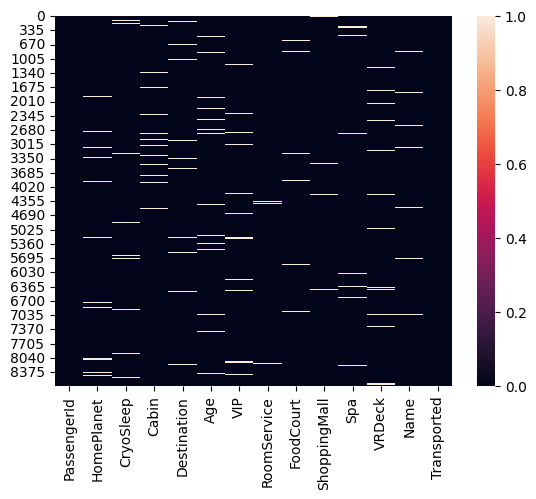

In [13]:
sns.heatmap(df.isnull())


 --- train 결측치 확인 --- 



<Axes: >

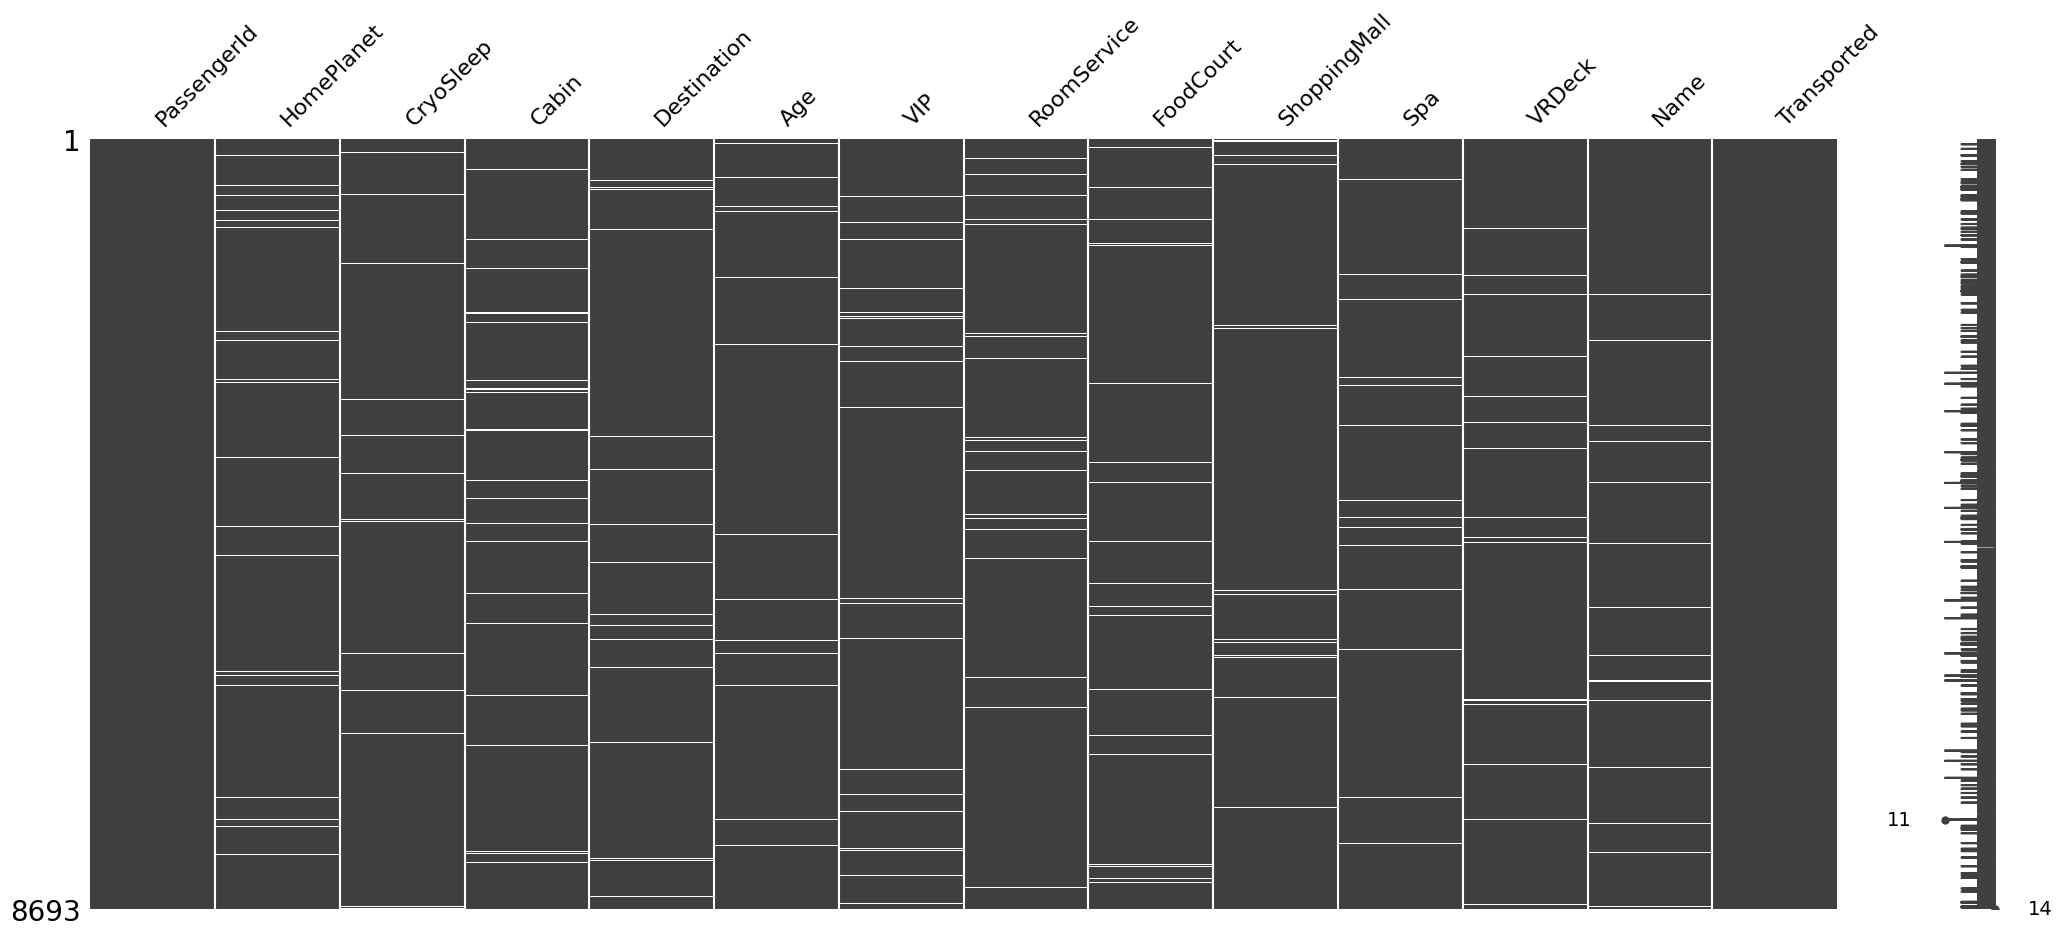

In [14]:
# train 결측치 확인
print('\n --- train 결측치 확인 --- \n')
missingno.matrix(df)


 --- test 결측치 확인 --- 



<Axes: >

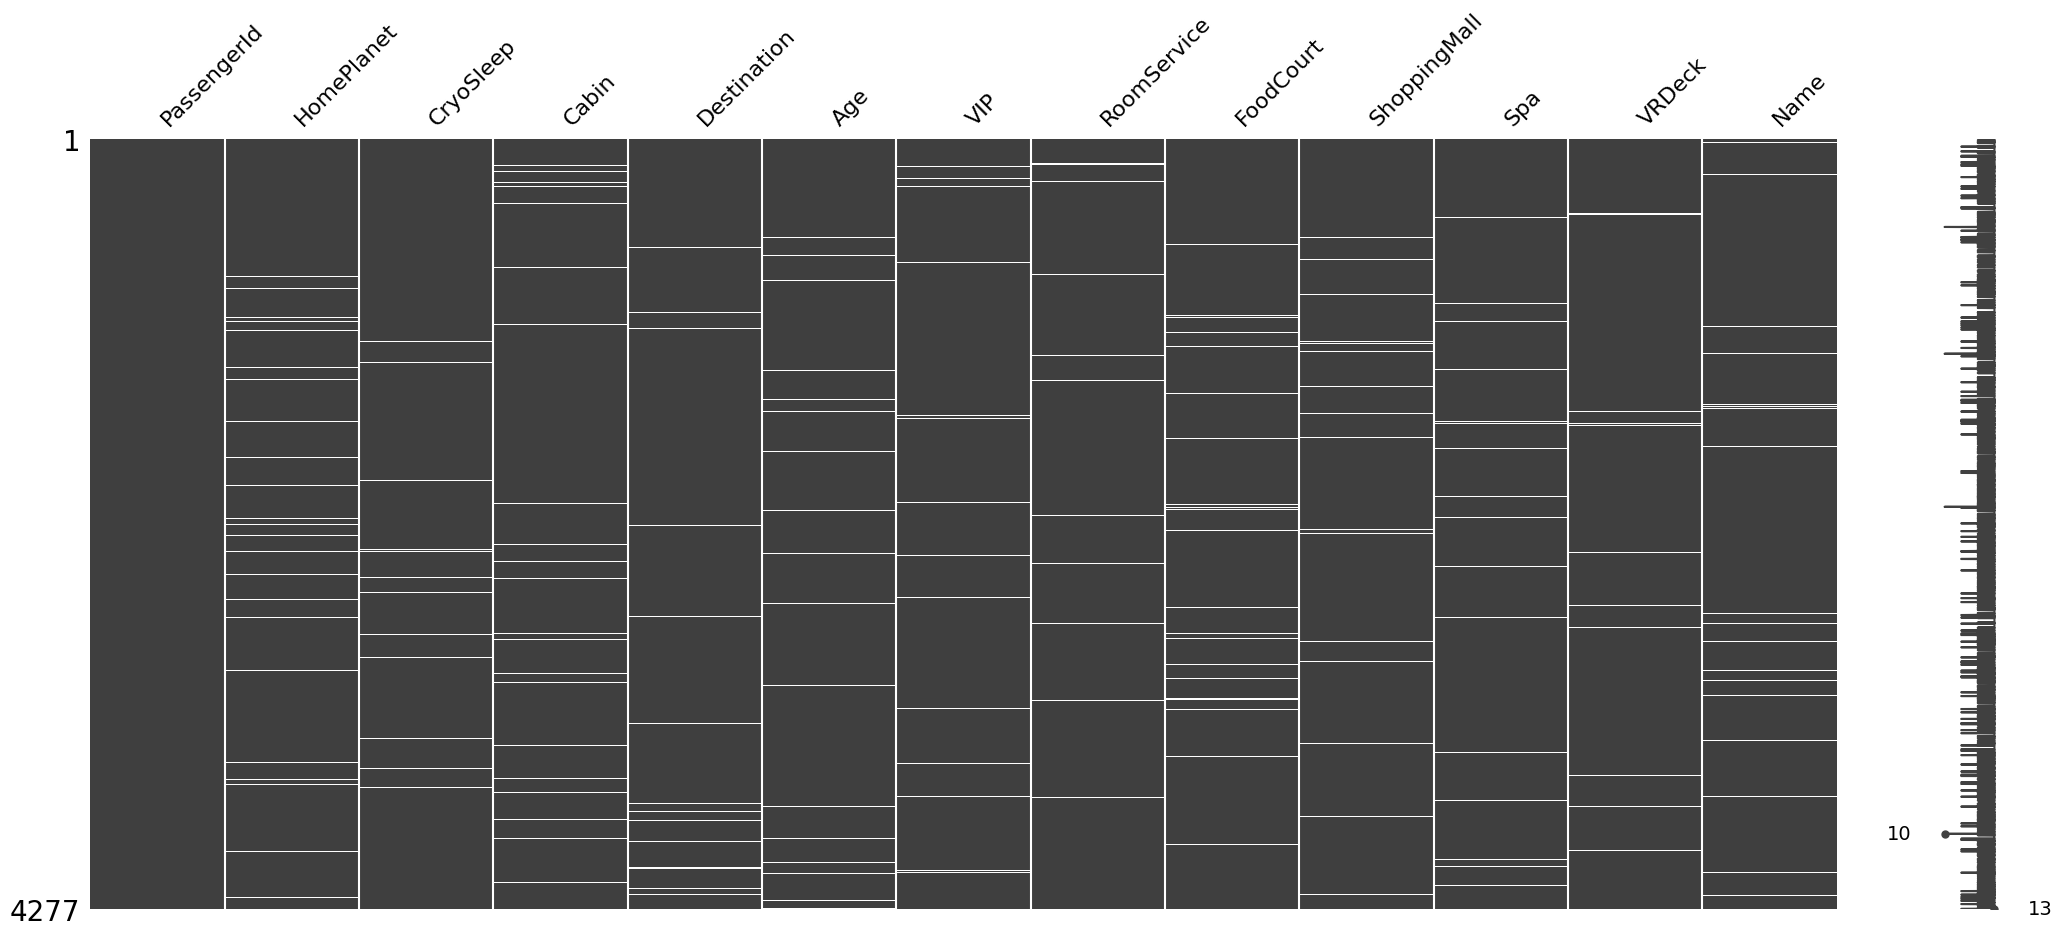

In [15]:
# test 결측치 확인
print('\n --- test 결측치 확인 --- \n')
missingno.matrix(data)

흰색으로 표시된 셀이 많을수록 결측치가 많다는 것을 나타내는데 이를 통해 PassengerID와 Transported를 제외한 나머지 컬럼 모두 결측치가 존재함을 알 수 있다.

### 상관관계 확인

<Axes: >

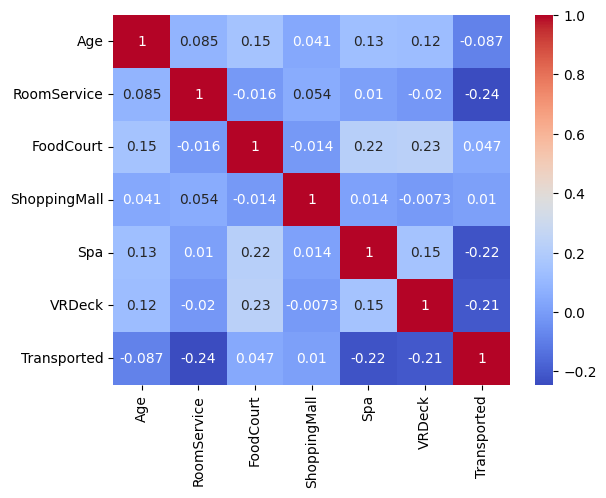

In [28]:
num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"]

sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")

RoomService > Spa > VRDeck 순으로 Transported와 상관관계가 높다.  
Age, FoodCourt, ShoppingMall 등은 상관관계가 다소 낮다.

# 결측치 제거 및 대체

- '**PassengerId**' 열은 탑승자의 고유 식별 번호를 나타내는 열.  
이 열은 데이터 분석에 중요한 역할을 하지 않기 때문에 제거할 수 있습니다.

- '**Name**' 열은 탑승자의 이름을 나타내는 열.   
이름 자체가 생존 여부와 직접적인 연관성이 없으므로 분석에 필요하지 않을 수 있음. 또한 이름을 분석에 활용하려면 추가적인 전처리 작업이 필요할 수 있음.  
따라서 분석의 목적에 따라 Name 열을 제거할 수 있습니다.

In [ ]:
# df.drop('PassengerId', axis=1)
# df.drop('Name', axis=1, inplace=True)
# data.drop('PassengerId', axis=1)
# data.drop('Name', axis=1, inplace=True)

In [18]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [16]:
print('\n --- Age 컬럼 정보 --- \n')
print(df['Age'].value_counts())


 --- Age 컬럼 정보 --- 

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64


In [17]:
print('\n --- VIP 컬럼 정보 --- \n')
print(df['VIP'].value_counts())


 --- VIP 컬럼 정보 --- 

False    8291
True      199
Name: VIP, dtype: int64


#**< 데이터프레임 *Age* 결측치를 채우기 >**

 

## Age : 결측치를 해당 열의 평균값으로 대체

**수치형 변수**의 경우 **평균값**으로 대체

In [27]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [28]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [29]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [30]:
data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

#### HistPlot을 이용한 'Age'와 'Transported'간의 상관관계 비교

Text(0.5, 0, 'Age (years)')

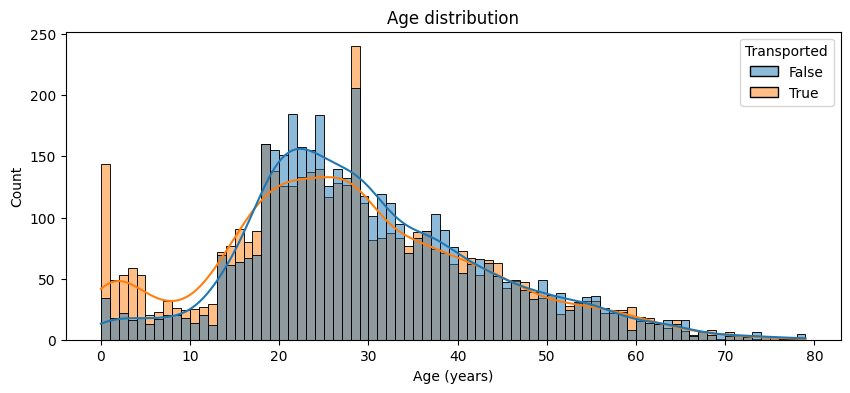

In [31]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

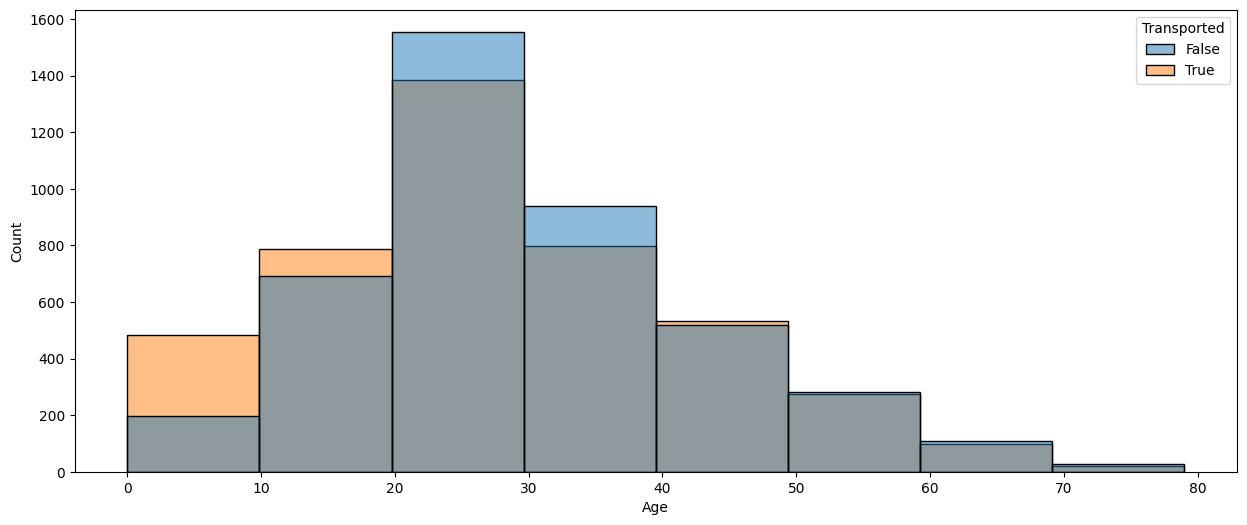

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.histplot(data=df, x="Age", hue="Transported", bins=8, ax=ax)
plt.show()

<ipython-input-33-0aeadb287d5a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="Age", hue="Transported", shade=True, ax=ax)


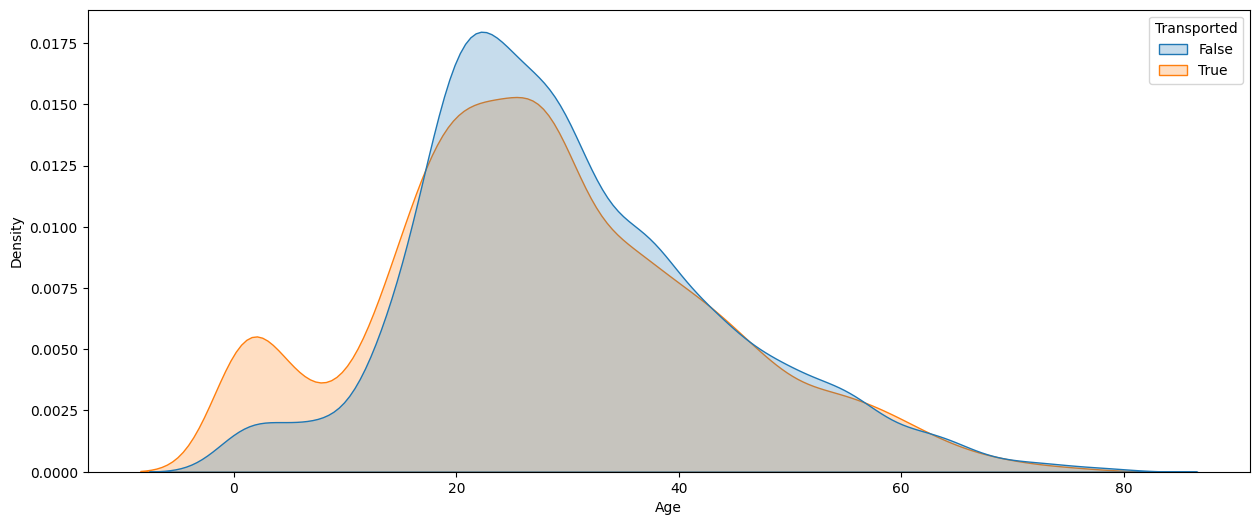

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.kdeplot(data=df, x="Age", hue="Transported", shade=True, ax=ax)
plt.show()

- 20세 미만의 어린이나 아기들이 Trasnported한 경우가 더 많다.  
- 20세에서 40세 사이에서는 Trasnported 되지 않은 사람이 조금 더 많다.  
- 40대 이상에서는 Trasnported 한 사람과 하지 않은 사람이 비슷하다.

## Age : 결측치를 Transported의 값 (True, False) 각각의 평균값으로 대체

train 데이터 세트와 test 데이터 세트 새로 불러오기

In [ ]:
df=pd.read_csv('/content/drive/My Drive/CUAI_BASIC/spaceship-titanic/train.csv')

In [ ]:
data=pd.read_csv('/content/drive/My Drive/CUAI_BASIC/spaceship-titanic/test.csv')

In [ ]:
df[df['Transported'] == 0]['Age'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       39.0
2       58.0
3       33.0
13      48.0
15      31.0
        ... 
8683    21.0
8686    32.0
8688    41.0
8689    18.0
8691    32.0
Name: Age, Length: 4315, dtype: float64>

In [ ]:
df[df['Transported'] == 1]['Age'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 1       24.0
4       16.0
5       44.0
6       26.0
7       28.0
        ... 
8684    23.0
8685     0.0
8687    30.0
8690    26.0
8692    44.0
Name: Age, Length: 4378, dtype: float64>

In [ ]:
df.loc[(df['Transported'] == 1) & (df['Age'].isnull()), 'Age'] = df[df['Transported'] == 0]['Age'].mean
df.loc[(df['Transported'] == 0) & (df['Age'].isnull()), 'Age'] = df[df['Transported'] == 1]['Age'].mean

In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

#### HistPlot을 이용한 'Age'와 'Transported'간의 상관관계 비교

Text(0.5, 0, 'Age (years)')

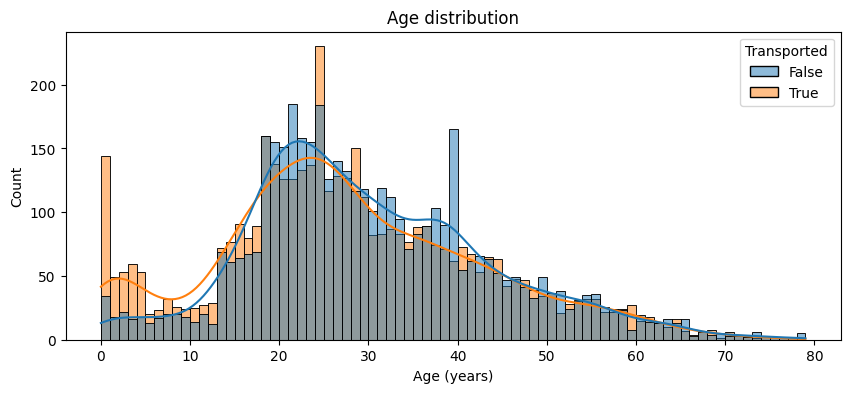

In [ ]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

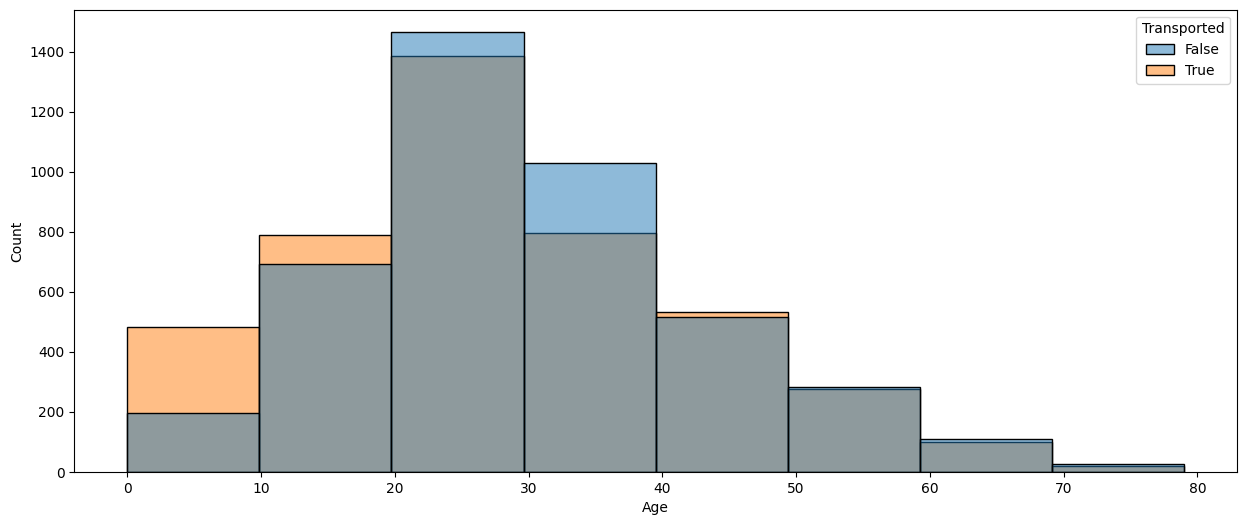

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.histplot(data=df, x="Age", hue="Transported", bins=8, ax=ax)
plt.show()

<ipython-input-24-0aeadb287d5a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="Age", hue="Transported", shade=True, ax=ax)


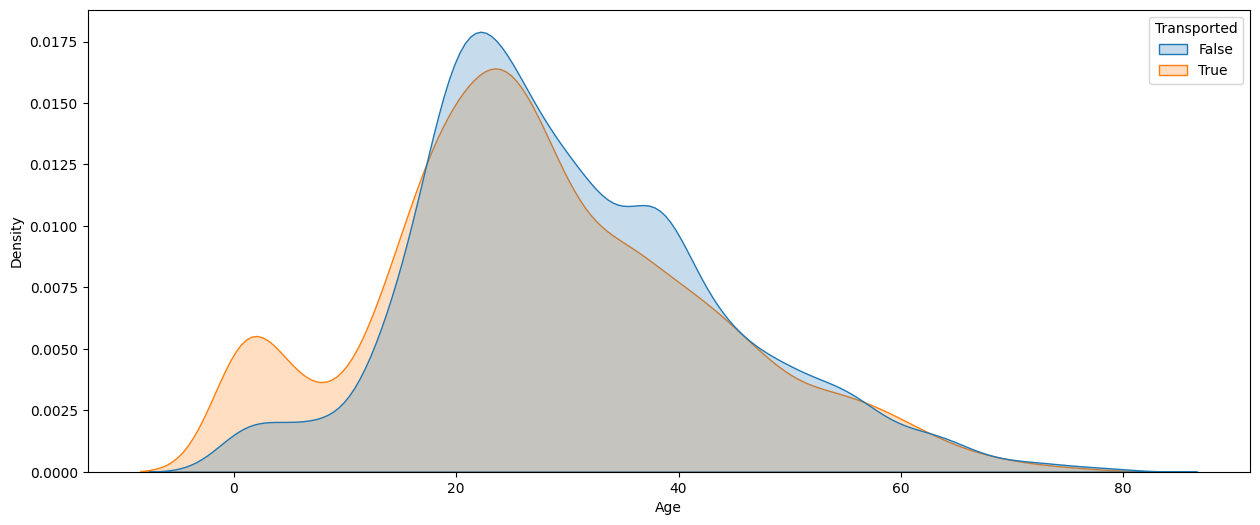

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.kdeplot(data=df, x="Age", hue="Transported", shade=True, ax=ax)
plt.show()

앞서 전체의 평균으로 결측치를 채웠을 때와 별로 차이가 없음을 알 수 있다.

## 'Age' 변수를 연령대별로 비교

#### 연령(Age) 변수를 범주형 변수로 바꿔줌

In [34]:
# New features - dfing set
df['Age_group']=np.nan
df.loc[df['Age']<=12,'Age_group']='Age_0-12'
df.loc[(df['Age']>12) & (df['Age']<18),'Age_group']='Age_13-17'
df.loc[(df['Age']>=18) & (df['Age']<=25),'Age_group']='Age_18-25'
df.loc[(df['Age']>25) & (df['Age']<=30),'Age_group']='Age_26-30'
df.loc[(df['Age']>30) & (df['Age']<=50),'Age_group']='Age_31-50'
df.loc[df['Age']>50,'Age_group']='Age_51+'

# New features - test set
data['Age_group']=np.nan
data.loc[ data['Age'] <= 12,'Age_group'] = 'Age_0-12'
data.loc[(data['Age'] > 12) & (data['Age'] <= 17),'Age_group'] = 'Age_13-17'
data.loc[(data['Age'] > 17) & (data['Age'] <= 25),'Age_group'] = 'Age_18-25'
data.loc[(data['Age'] > 25) & (data['Age'] <= 30),'Age_group'] = 'Age_26-30'
data.loc[(data['Age'] > 30) & (data['Age'] <= 50),'Age_group'] = 'Age_31-50'
data.loc[ data['Age'] > 50,'Age_group'] = 'Age_51+'

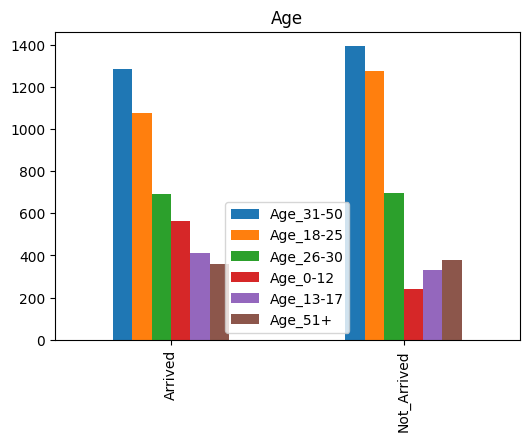

In [38]:
Arrived = df[df['Transported'] == 1]['Age_group']. value_counts()
Not_Arrived = df[df['Transported'] == 0]['Age_group']. value_counts()
train_df = pd. DataFrame([Arrived, Not_Arrived])
train_df. index = ['Arrived','Not_Arrived']
train_df. plot(kind= 'bar',stacked= False, figsize= (6,4)). legend(loc = 'lower center')
plt.title('Age')
plt. show()

Text(0.5, 1.0, 'Age group distribution')

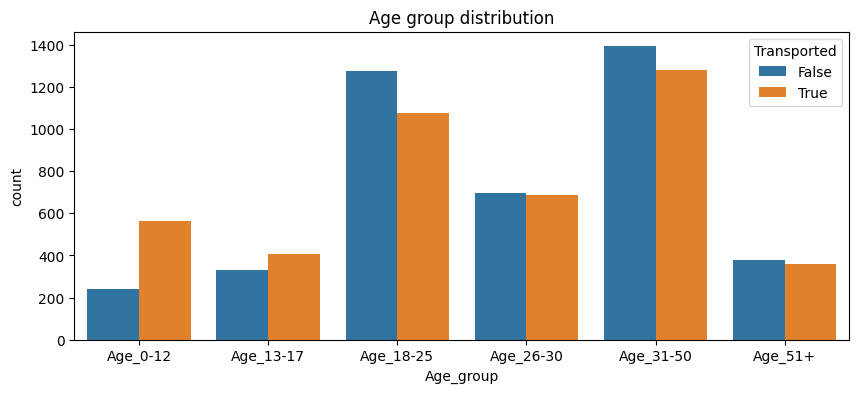

In [41]:
# Plot distribution of new features
plt.figure(figsize=(10,4))
g=sns.countplot(data=df, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

나이가 어릴 수록 도착한 비율이 높게 나오며, 18 ~ 25세의 집단과 31 ~ 50세의 집단은 도착하지 못한 비율이 더 높음.

<Axes: xlabel='Age'>

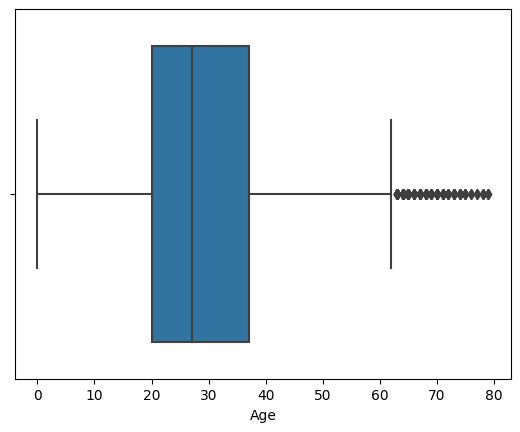

In [42]:
sns.boxplot(data=df,x='Age')

###'Age' 변수를 'Transported'로 비교

<Axes: xlabel='Transported', ylabel='Age'>

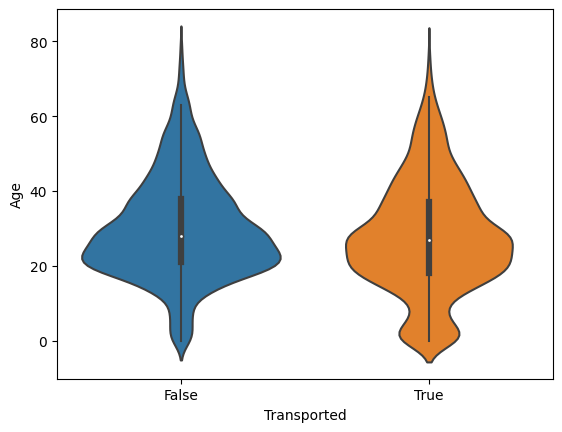

In [45]:
sns.violinplot(data=df, x='Transported', y='Age')
#데이터 분포를 부드러운 곡선으로 나타내며, x축은 데이터 값의 범위를 나타내고 y축은 확률 밀도를 나타냅니다.

In [47]:
df['Age'].describe()

count    8693.000000
mean       28.827930
std        14.339054
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [48]:
df['Age_group'].describe()

count          8693
unique            6
top       Age_31-50
freq           2674
Name: Age_group, dtype: object

<Axes: >

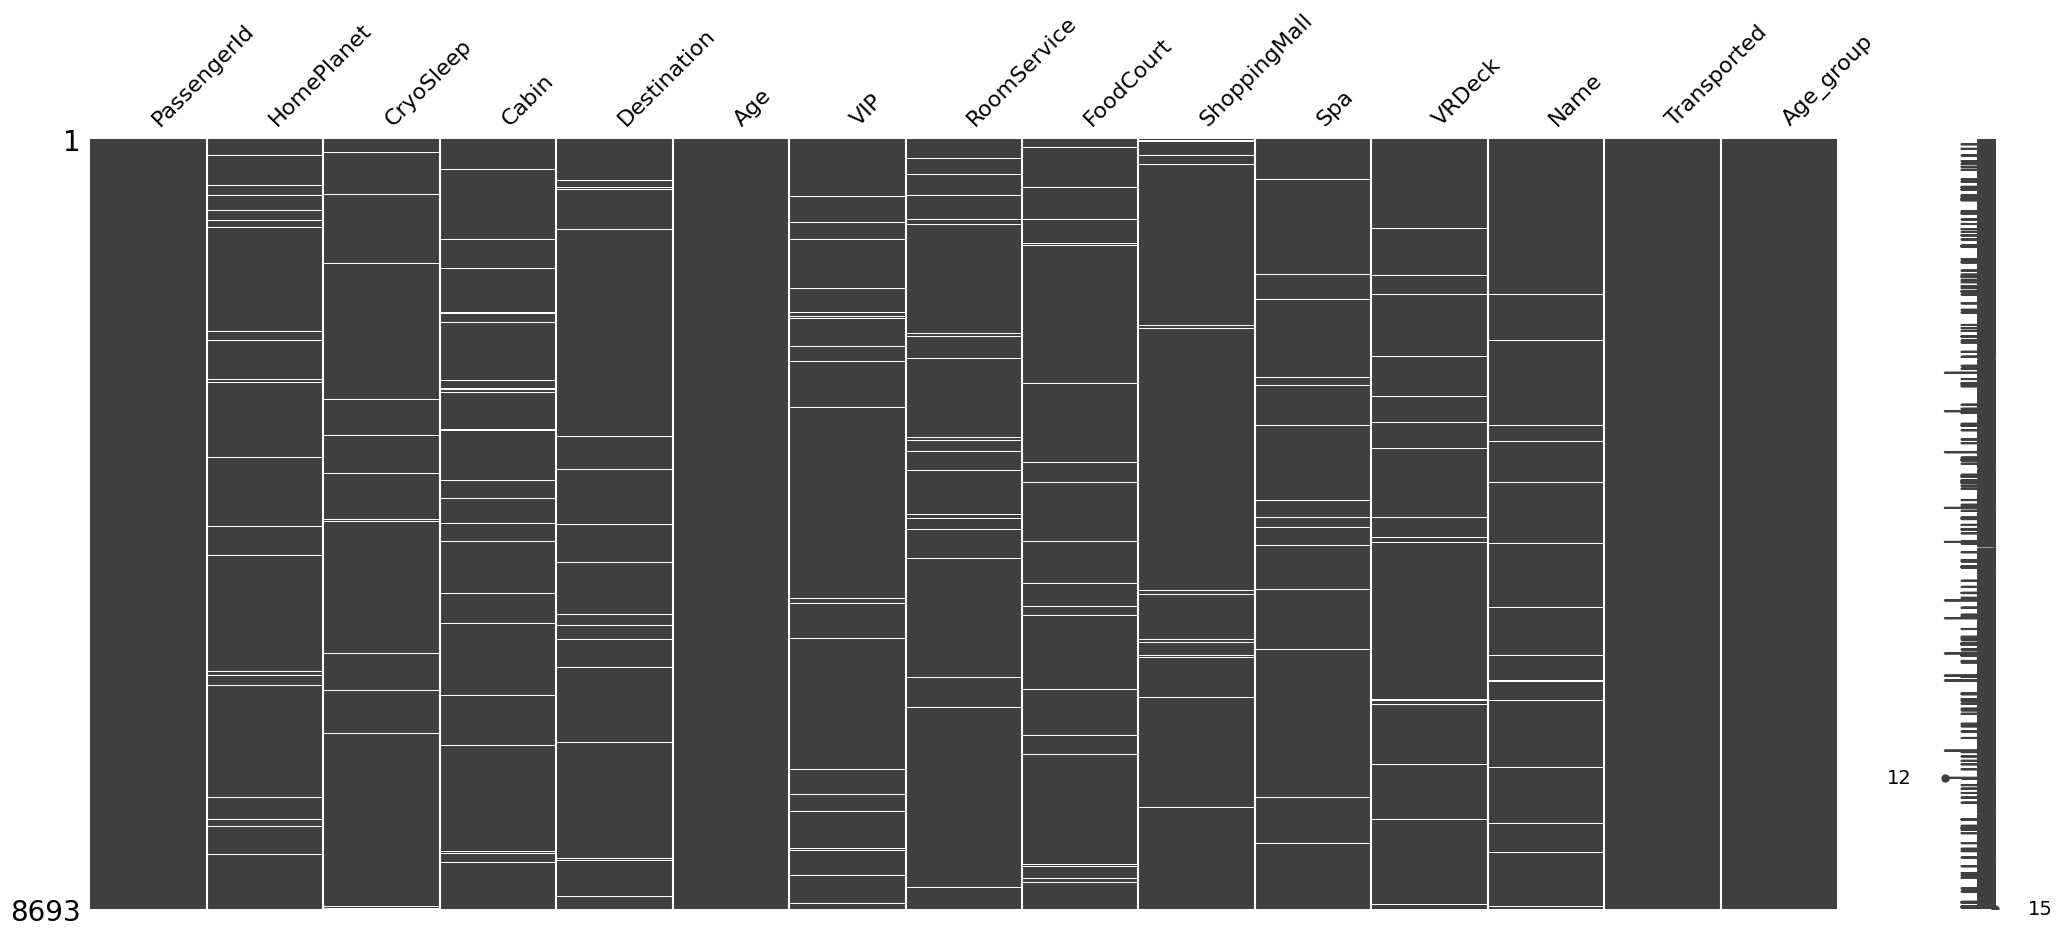

In [49]:
missingno.matrix(df)

##**< 데이터프레임 *VIP* 결측치를 채우기 >**



**범주형 변수**의 경우 **최빈값**으로 대체

In [50]:
df['VIP']=df['VIP'].fillna(df['VIP'].mode()[0])

In [51]:
data['VIP']=data['VIP'].fillna(data['VIP'].mode()[0])

<Axes: >

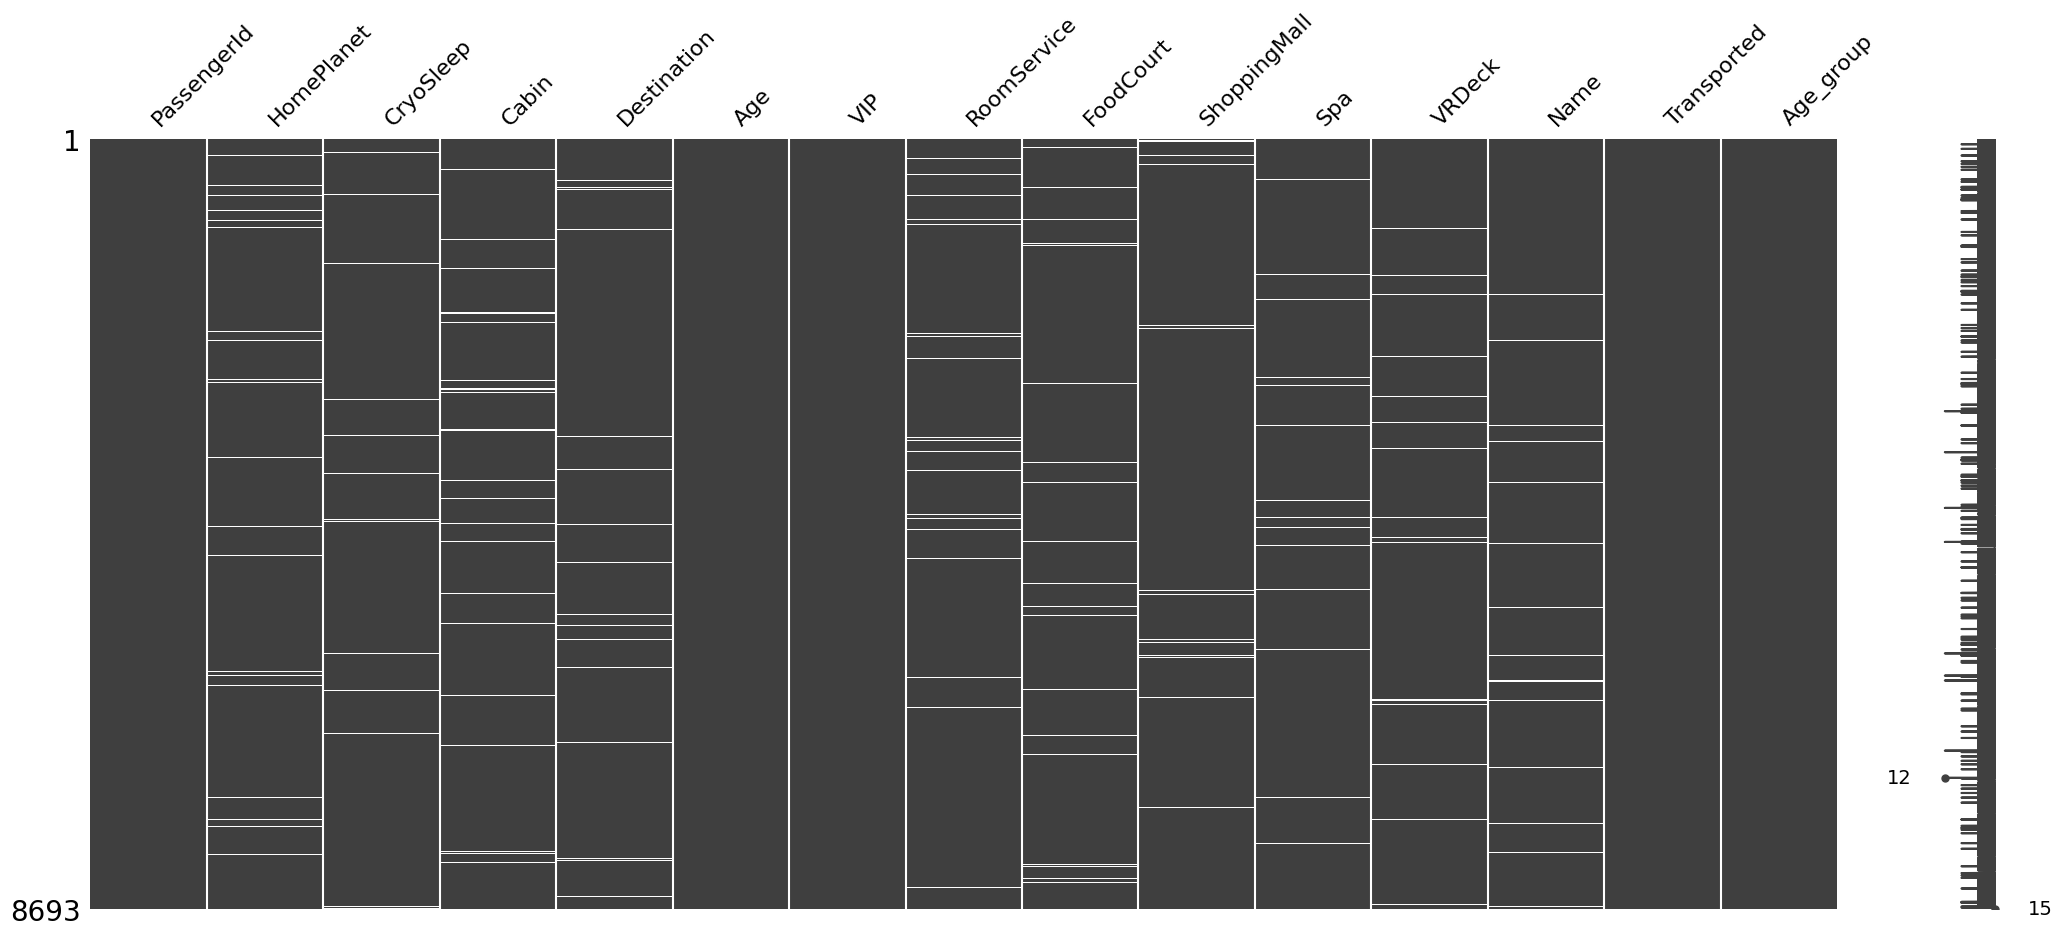

In [52]:
missingno.matrix(df)

<Axes: xlabel='VIP', ylabel='Transported'>

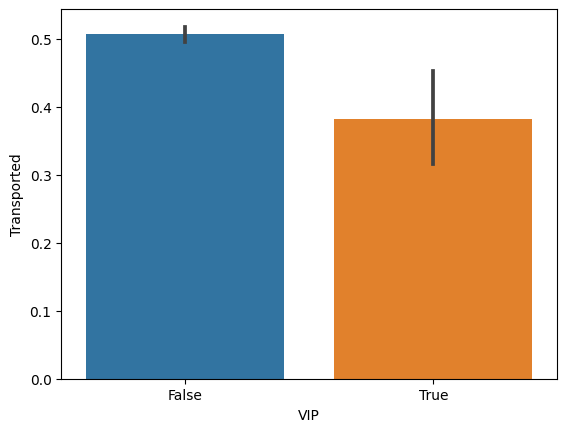

In [53]:
sns.barplot(x = 'VIP', y = 'Transported', data = df)

<Axes: xlabel='VIP', ylabel='count'>

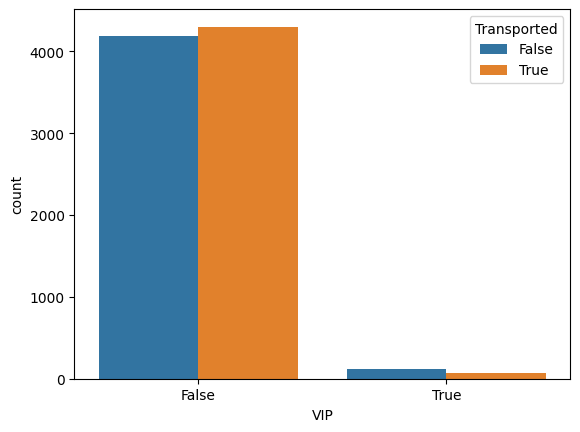

In [54]:
sns.countplot(data=df, x='VIP', hue='Transported')

VIP의 유무는 결과에 차이를 보여주지 않음.

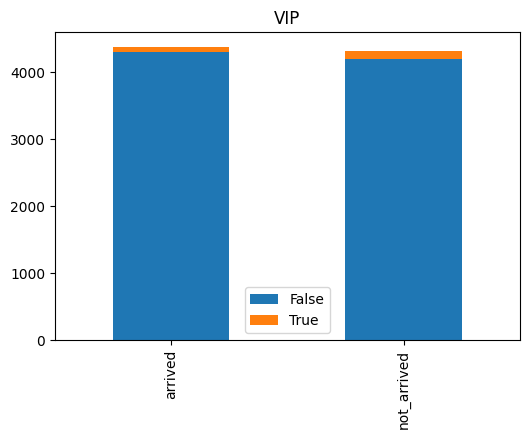

In [55]:
df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported')

arrived = df[df['Transported'] == 1]['VIP']. value_counts()
not_arrived = df[df['Transported'] == 0]['VIP']. value_counts()
train_df = pd. DataFrame([arrived, not_arrived])
train_df. index = ['arrived','not_arrived']
train_df. plot(kind= 'bar',stacked= True , figsize= (6,4))
plt.title('VIP')
plt. show()

- vip를 신청한 사람 중 제대로 도착을 한 인원의 비중이 약 38퍼센트, 신청하지 않은 사람 중 도착한 인원의 비중이 약 50퍼센트인 것을 확인할 수 있습니다.
- 그래프로 나타내었을 때 약 1.3배의 차이가 있지만 신청을 하지 않은 사람의 비중이 압도적으로 크므로 크게 영향이 있다고 보기는 어렵습니다.

## 훈련 자료에서 VIP 여부(VIP)와 이동성공(Transported)에 따른 연령(Age) 분포

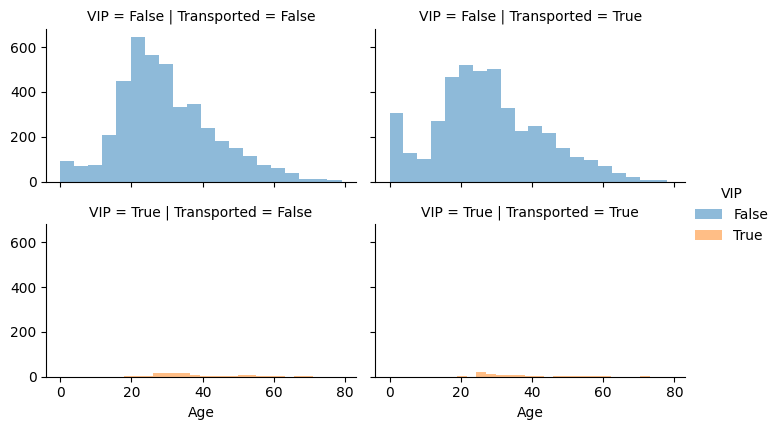

In [ ]:
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
grid = sns.FacetGrid(df, col='Transported', row='VIP', hue="VIP", height=2.2, aspect=1.6)

grid.map(plt.hist, 'Age', alpha=.5, bins=20) # 투명도(alpha): 0.5

# 범례 추가
grid.add_legend();

#### Age 변수를 범주형인 AgeBand로 사용할 때



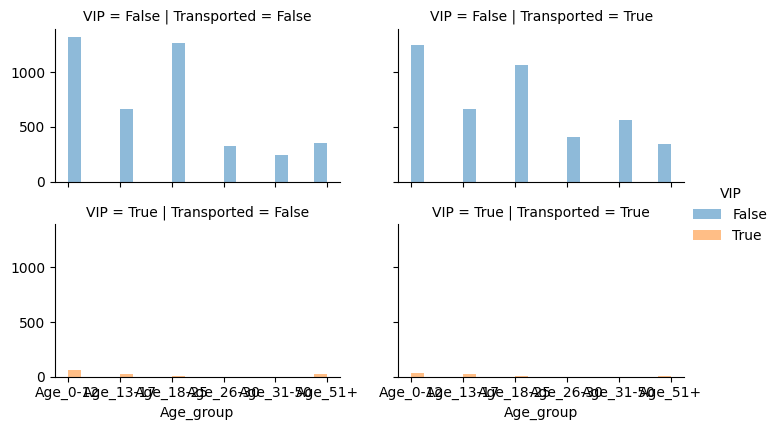

In [59]:
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
grid = sns.FacetGrid(df, col='Transported', row='VIP', hue="VIP", height=2.2, aspect=1.6)

age_order = ['Age_0-12', 'Age_13-17', 'Age_18-25', 'Age_26-30', 'Age_31-50', 'Age_51+']

grid.map(plt.hist, 'Age_group', alpha=.5, bins=20) # 투명도(alpha): 0.5

grid.set_xticklabels(labels=age_order)

# 범례 추가
grid.add_legend();

### Encoding

- Categorical Data Columns을 숫자로 바꾸어주는 작업  
→ cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']로 사용 가능

In [60]:
cat_cols = ['VIP']
data_oh = pd.get_dummies(df, columns=cat_cols)

In [61]:
data_oh

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_group,VIP_False,VIP_True
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Age_31-50,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Age_18-25,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Age_51+,0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Age_31-50,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Age_13-17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Age_31-50,0,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Age_18-25,1,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Age_26-30,1,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Age_31-50,1,0


In [ ]:
data_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
 12  VIP_False     8693 non-null   uint8  
 13  VIP_True      8693 non-null   uint8  
dtypes: bool(1), float64(6), object(5), uint8(2)
memory usage: 772.6+ KB


### Scaling, Scaler

- Numeric Columns에 적용하는 데이터 전처리 방법
- Feature별로 단위가 다르고 그에 따라 수의 크기도 다르다.
- 만약 ML 알고리즘 안에서 Feauture 데이터의 크기를 이용하는 또는 계산하는 것이 포함되어 있다면, 수가 큰 Feature에 큰 영향을 받을 것이다.
- 따라서 각 Feature의 단위를 없애주고 모두 같은 크기를 가지도록 Feature를 변환해주는 작업이 바로 Scaling이다.

In [ ]:
data_oh.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP_False,VIP_True
count,8693.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.977108,0.022892
std,14.339054,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.149568,0.149568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,37.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000,0.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000


num_cols = ['Age', 'RoomService', 'Spa', 'VRDeck']과 같이 사용 가능

In [ ]:
num_cols = ['Age']

#### (1) Standardization (표준화), Standard Scaler

- (통계학에서) 정규분포에서 표준정규분포로 변환할 때 사용하는 방법을 사용한다.

- 표준화를 적용한 Feature들은 모두 평균 0과 표준편차 1을 가진다.
- 각 컬럼의 최소와 최대는 반드시 0과 1은 아니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
data_std = data_oh.copy()
scaler = StandardScaler()
data_std[num_cols] = scaler.fit_transform(data_std[num_cols])

In [ ]:
data_oh.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP_False,VIP_True
count,8693.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.977108,0.022892
std,14.339054,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.149568,0.149568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,37.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000,0.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000


#### (2) MinMaxScaler

- 각 칼럼의 최소값과 최대값이 각각 0과 1이 되도록 스케일해주는 것을 MinMaxScaler
- Standard Scaler와의 차이: 각 칼럼의 평균과 표준편차는 0과 1은 아니다.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_minmax = data_oh.copy()
scaler = MinMaxScaler()
data_minmax[num_cols] = scaler.fit_transform(data_minmax[num_cols])

In [ ]:
data_std

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,VIP_False,VIP_True
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,0.709437,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,-0.336717,109.0,9.0,25.0,549.0,44.0,True,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,2.034566,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,0.290975,0.0,1283.0,371.0,3329.0,193.0,False,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,-0.894666,303.0,70.0,151.0,565.0,2.0,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,0.848924,0.0,6819.0,0.0,1643.0,74.0,False,0,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,-0.755179,0.0,0.0,0.0,0.0,0.0,False,1,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,-0.197230,0.0,0.0,1872.0,1.0,0.0,True,1,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,0.221232,0.0,1049.0,0.0,353.0,3235.0,False,1,0


In [ ]:
data_oh.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP_False,VIP_True
count,8693.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.977108,0.022892
std,14.339054,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.149568,0.149568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,37.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000,0.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000
